In [1]:

#just installing everything you need for the code
%pip install -r requirements.txt
%pip install dill
%pip install datasets fastparquet pyarrow pytorch-lightning torchvision torchmetrics xgboost PyTorch TensorFlow
%pip install matplotlib
%pip install pillow
%pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import utils
from PIL import Image
import os

display = utils.notebook_init()  


YOLOv5  v7.0-235-gf89803bb Python-3.10.13 torch-2.1.0+cpu CPU


Setup complete  (16 CPUs, 15.8 GB RAM, 850.7/930.9 GB disk)


In [2]:
#training the drone data on 100 epochs and 32 batch size
!python train.py --data cocoDrone.yaml --epochs 100 --weights '' --cfg yolov5n.yaml  --batch-size 32   

train: weights='', cfg=yolov5n.yaml, data=cocoDrone.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-231-g4494ebc1 Python-3.9.17 torch-2.0.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate

In [25]:
#testing how well the model does at detecting drones
!python detect.py --weights runs/train/exp36/weights/best.pt --img 640 --conf 0.25 --source data/images/Drones

detect: weights=['runs/train/exp36/weights/best.pt'], source=data/images/Drones, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-235-gf89803bb Python-3.10.13 torch-2.1.0+cpu CPU

Fusing layers... 
YOLOv5m summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/18 C:\Users\blake\yolov5\data\images\Drones\Drone1.jpg: 480x640 (no detections), 154.2ms
image 2/18 C:\Users\blake\yolov5\data\images\Drones\Drone2.jpg: 640x640 (no detections), 199.5ms
image 3/18 C:\Users\blake\yolov5\data\images\Drones\pic_215.jpg: 320x640 1 Drone, 118.7ms
image 4/18 C:\Users\blake\yolov5\data\images\Drones\pic_220.jpg: 448

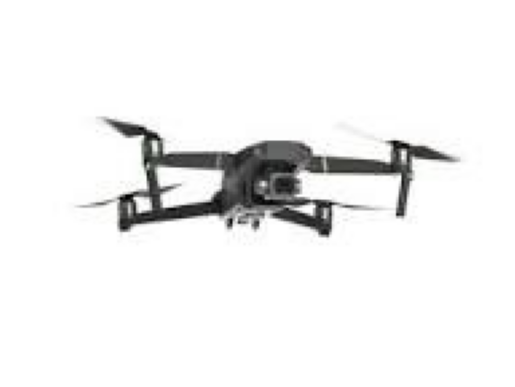

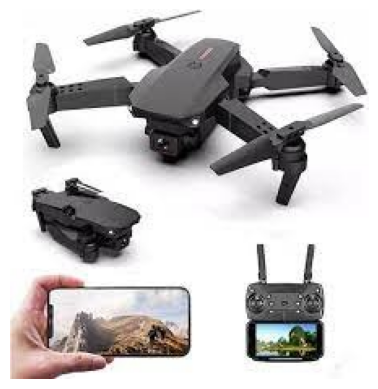

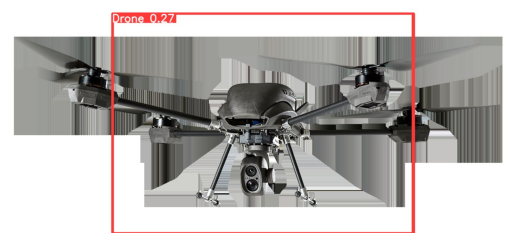

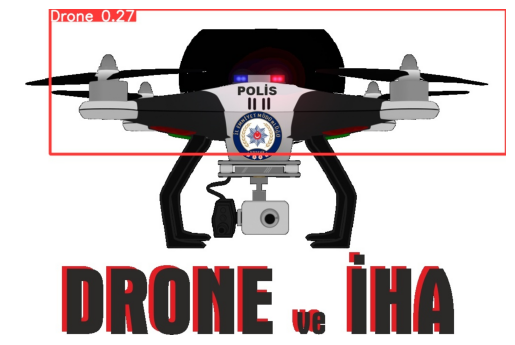

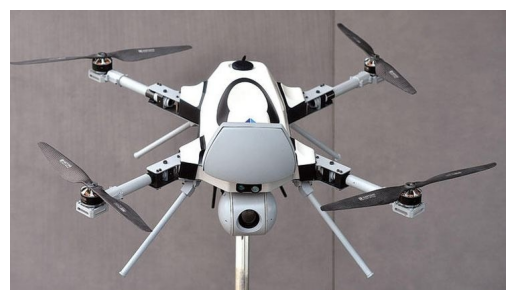

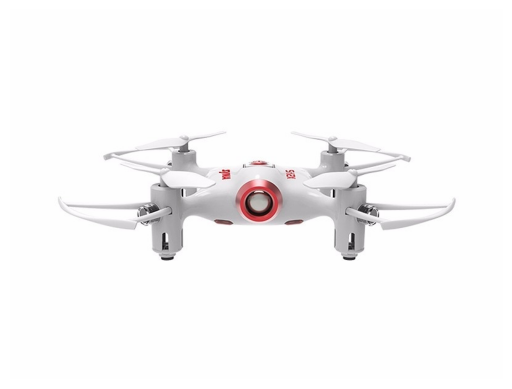

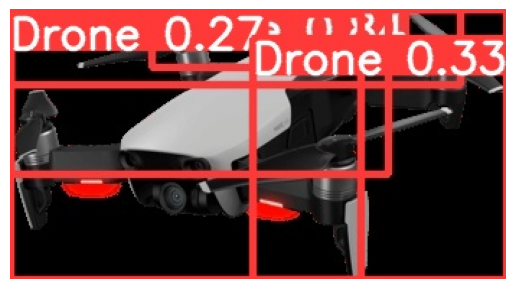

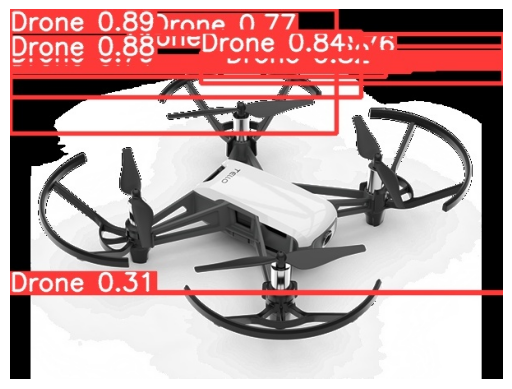

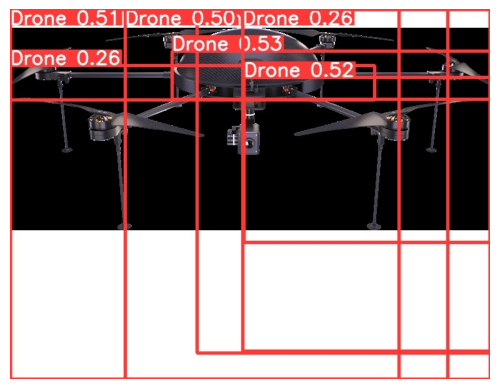

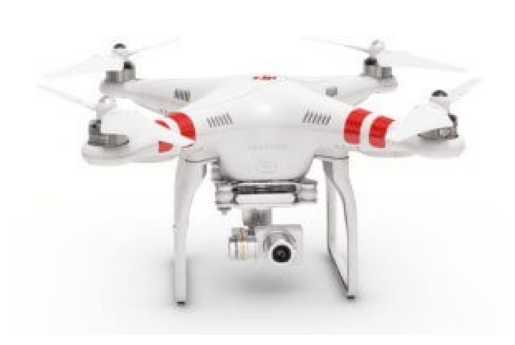

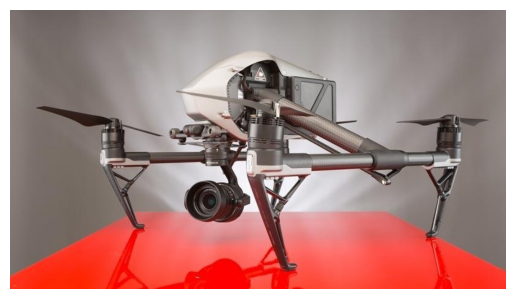

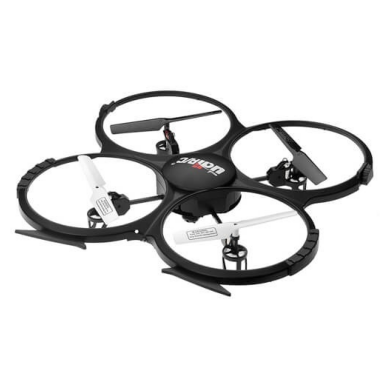

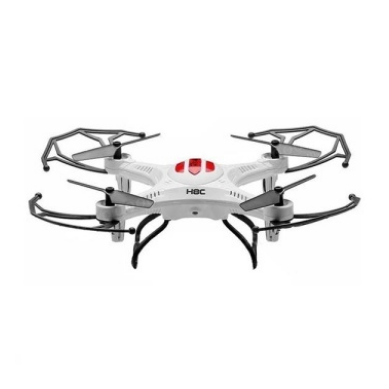

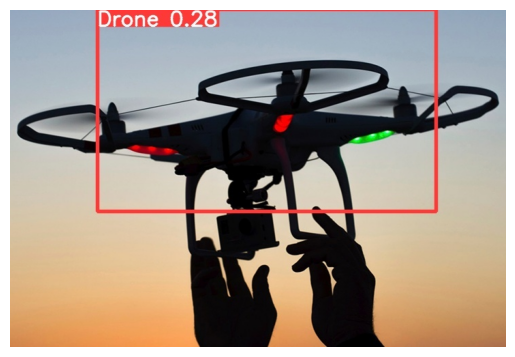

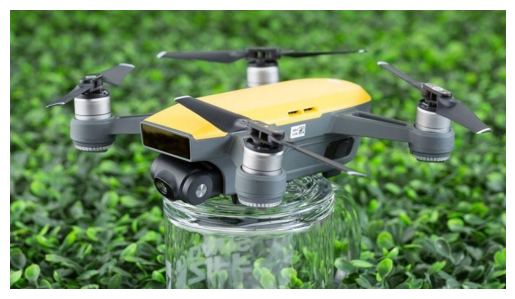

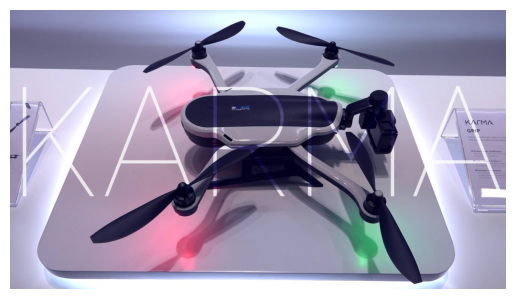

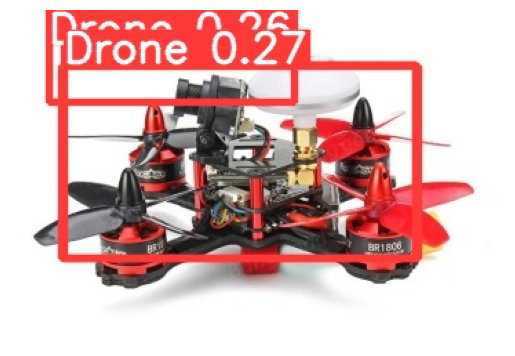

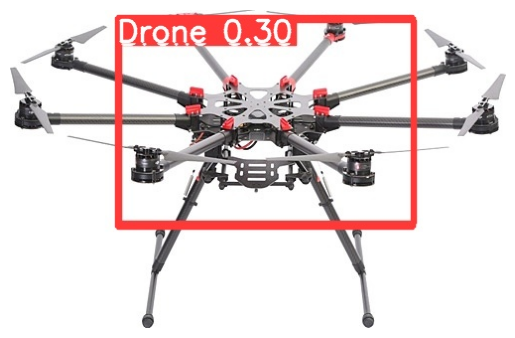

In [26]:
#so what this code is doing is it is finding the most recent folder in runs/detect so i can display all the images that we just tested 
base_path = 'runs/detect'
most_recent_file = None
most_recent_time = 0

#for every folder gets its time and compares it to get the most recent folder 
for entry in os.scandir(base_path):
    if entry.is_dir():
        # Get the modification time 
        mod_time = entry.stat().st_mtime_ns
        if mod_time > most_recent_time:
            # Updates the most recent folder and its modification time
            most_recent_directory = entry.name
            most_recent_time = mod_time
            
if most_recent_directory:
    most_recent_directory_path = os.path.join(base_path, most_recent_directory)

    # List image files in the folder
    image_files = [entry.path for entry in os.scandir(most_recent_directory_path) if entry.is_file() and entry.name.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if image_files:
        # Display every image in the found folder
        for image_path in image_files:
            img = mpimg.imread(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()


Index(['               epoch', '      train/box_loss', '      train/obj_loss',
       '      train/cls_loss', '   metrics/precision', '      metrics/recall',
       '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss',
       '        val/obj_loss', '        val/cls_loss', '               x/lr0',
       '               x/lr1', '               x/lr2'],
      dtype='object')


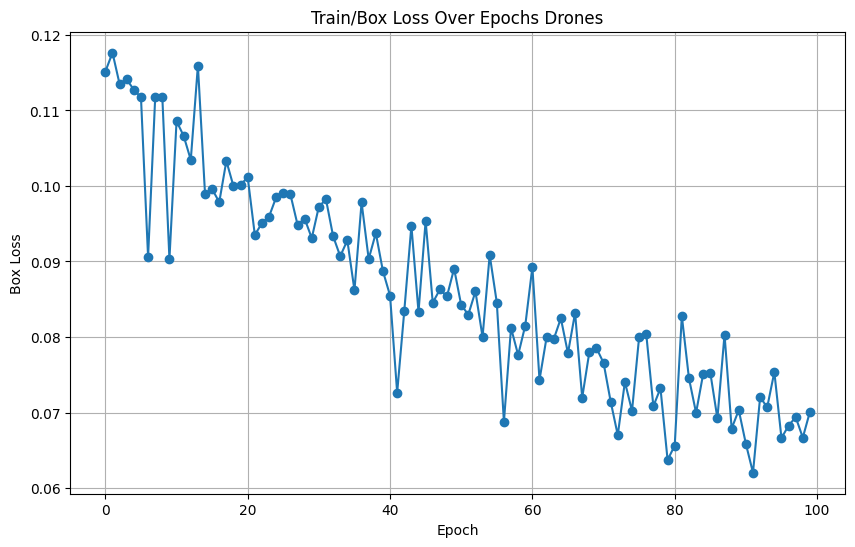

In [4]:
#gets ths data from the training results
csv_file = "runs/train/exp36/results.csv"
df = pd.read_csv(csv_file)
print(df.columns)


#gets the values from the results 
box_loss = df['      train/box_loss']
epochs = df['               epoch']

# Create the line graph
plt.figure(figsize=(10, 6))  #
plt.plot(epochs, box_loss, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Box Loss")
plt.title("Train/Box Loss Over Epochs Drones")
plt.grid(True)  
plt.show()


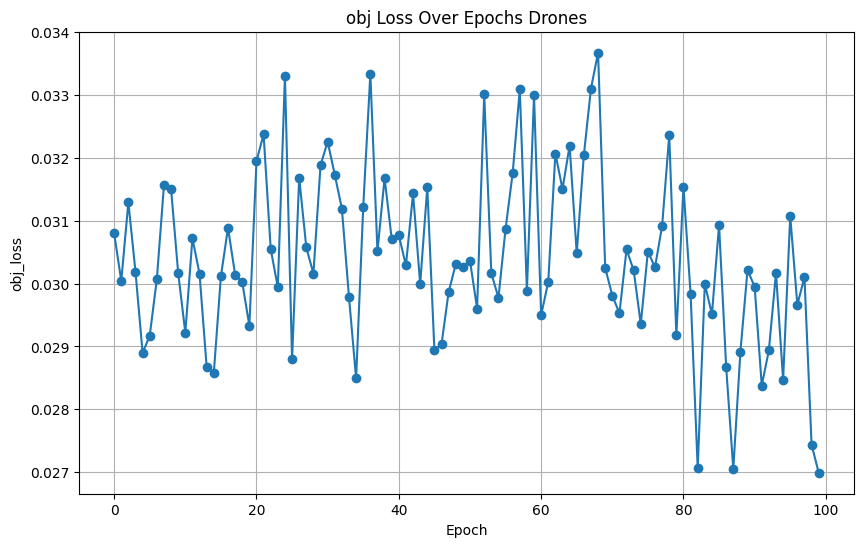

In [5]:
#gets the values from the results 
obj_loss = df['      train/obj_loss']
epochs = df['               epoch']

# Create the line graph
plt.figure(figsize=(10, 6)) 
plt.plot(epochs, obj_loss, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("obj_loss")
plt.title("obj Loss Over Epochs Drones")
plt.grid(True)  
plt.show()

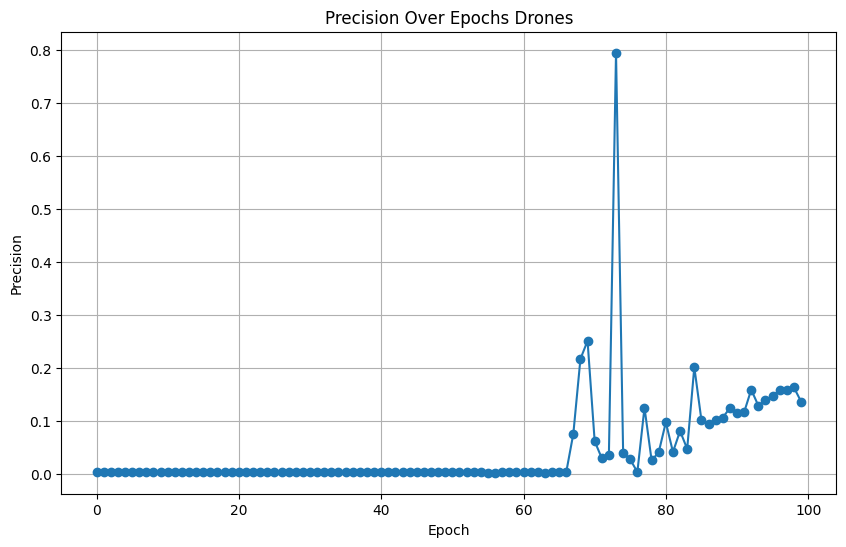

In [6]:
#gets the values from the results 
Precision = df['   metrics/precision']
epochs = df['               epoch']

# Create the line graph
plt.figure(figsize=(10, 6)) 
plt.plot(epochs, Precision, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.title("Precision Over Epochs Drones")
plt.grid(True)  
plt.show()

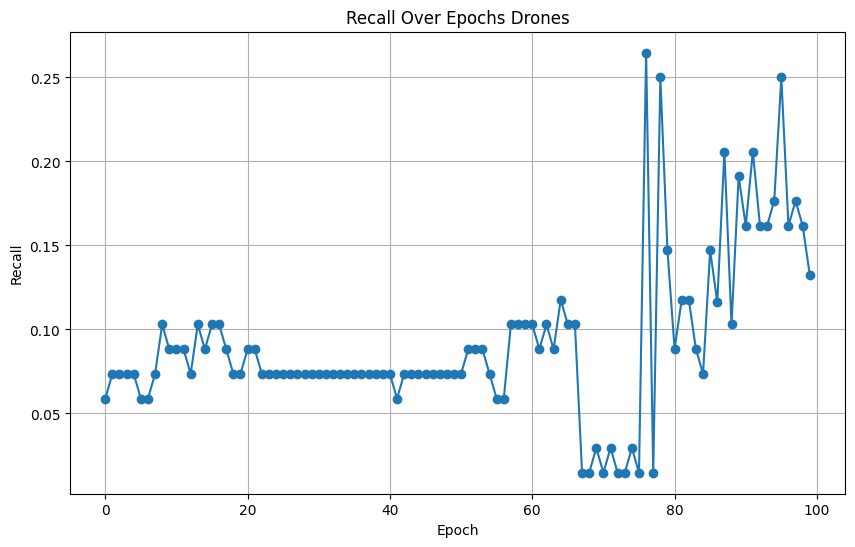

In [7]:
#gets the values from the results 
Recall = df['      metrics/recall']
epochs = df['               epoch']

# Create the line graph
plt.figure(figsize=(10, 6)) 
plt.plot(epochs, Recall, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.title("Recall Over Epochs Drones")
plt.grid(True)  
plt.show()

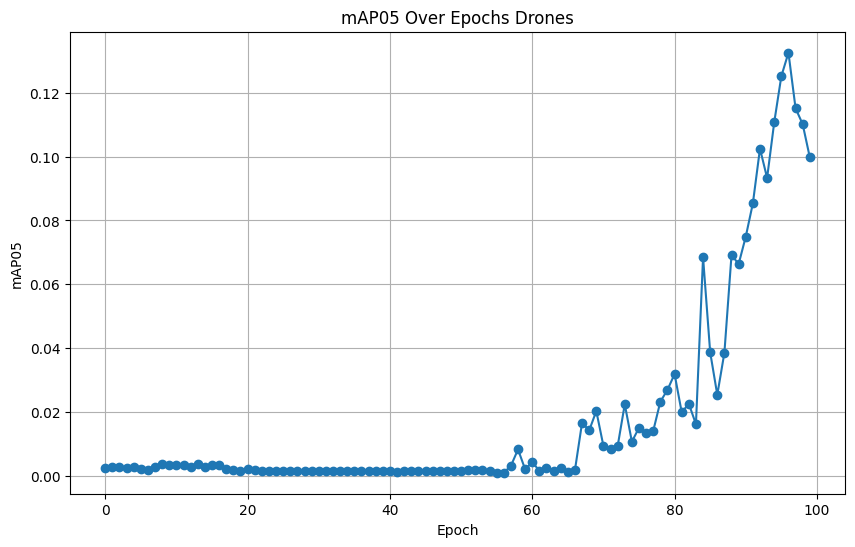

In [8]:
#gets the values from the results 
mAP05 = df['     metrics/mAP_0.5']
epochs = df['               epoch']

# Create the line graph
plt.figure(figsize=(10, 6)) 
plt.plot(epochs, mAP05, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("mAP05")
plt.title("mAP05 Over Epochs Drones")
plt.grid(True)  
plt.show()

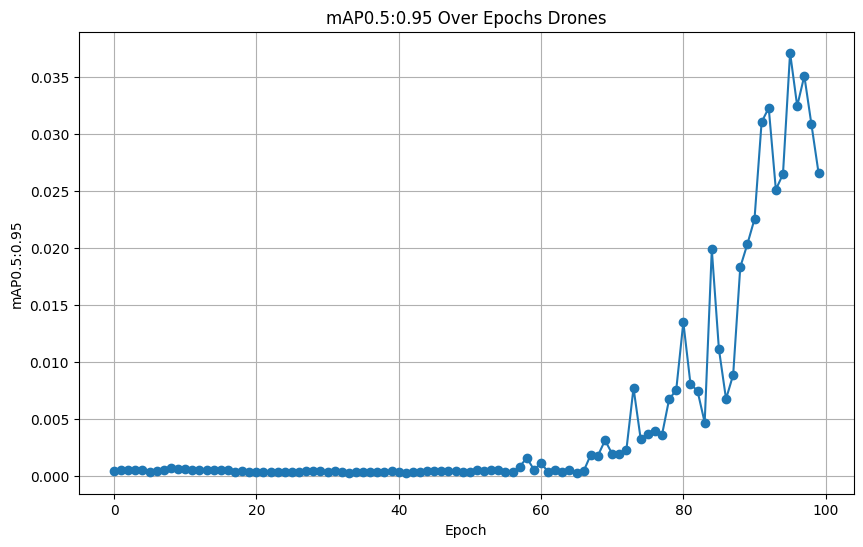

In [9]:
#gets the values from the results 
mAP095 = df['metrics/mAP_0.5:0.95']
epochs = df['               epoch']

# Create the line graph
plt.figure(figsize=(10, 6)) 
plt.plot(epochs, mAP095, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("mAP0.5:0.95")
plt.title("mAP0.5:0.95 Over Epochs Drones")
plt.grid(True)  
plt.show()

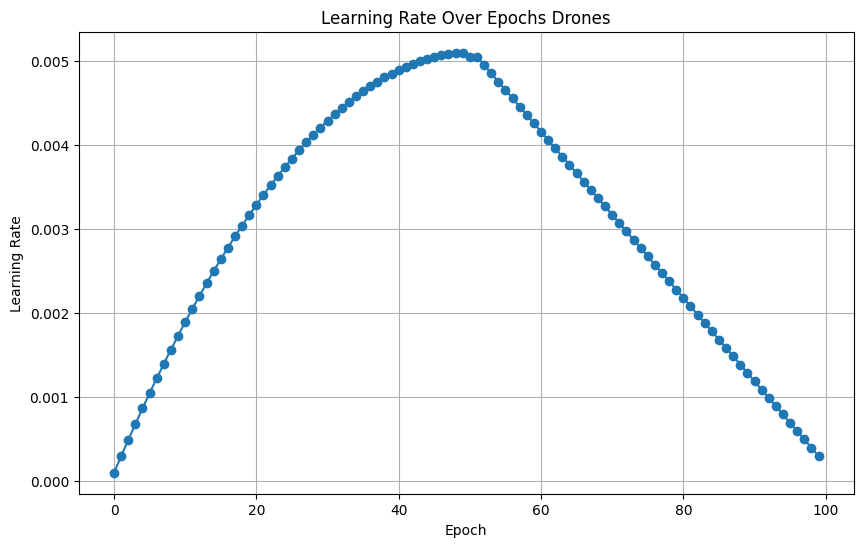

In [14]:
#gets the values from the results 
LearningRate = df['               x/lr1']
epochs = df['               epoch']

# Create the line graph
plt.figure(figsize=(10, 6)) 
plt.plot(epochs, LearningRate, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Over Epochs Drones")
plt.grid(True)  
plt.show()

In [ ]:
#training the drone data on 100 epochs and 32 batch size
!python train.py --data cocoStarfish.yaml --epochs 100 --weights '' --cfg yolov5n.yaml  --batch-size 16

In [15]:
#testing how well the model does at detecting drones
!python detect.py --weights runs/train/exp46/weights/best.pt   --img 640 --conf 0.25 --source datasets/coco/Starfish_dataset/test/images

detect: weights=['runs/train/exp46/weights/best.pt'], source=datasets/coco/Starfish_dataset/test/images, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-235-gf89803bb Python-3.10.13 torch-2.1.0+cpu CPU

Fusing layers... 
YOLOv5n summary: 157 layers, 1761871 parameters, 0 gradients, 4.1 GFLOPs
image 1/20 C:\Users\blake\yolov5\datasets\coco\Starfish_dataset\test\images\27819-24534-32063_jpg.rf.f3ae7736e5848fac98ce2440fcc59c07.jpg: 640x640 18 Sea Urchins, 54.9ms
image 2/20 C:\Users\blake\yolov5\datasets\coco\Starfish_dataset\test\images\27868-9866-16770_jpg.rf.597bd4758558296667f920da33ed1650.jpg: 640x640 6 Sea Urchins,

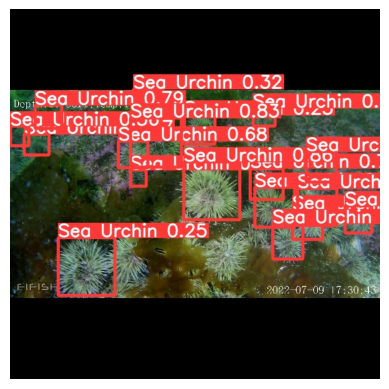

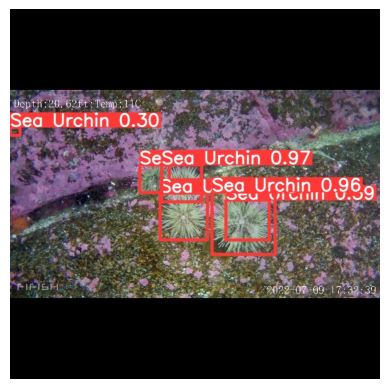

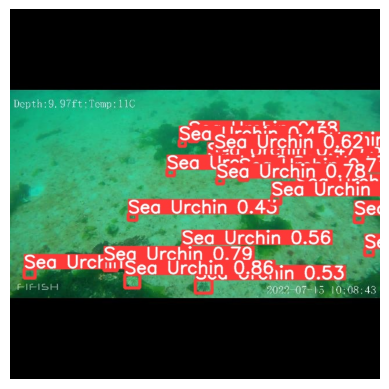

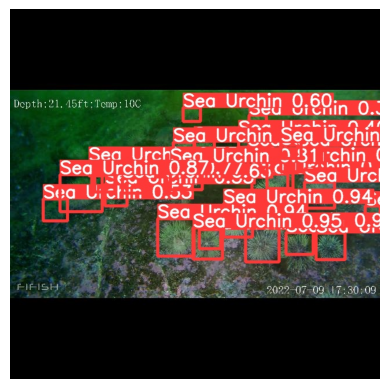

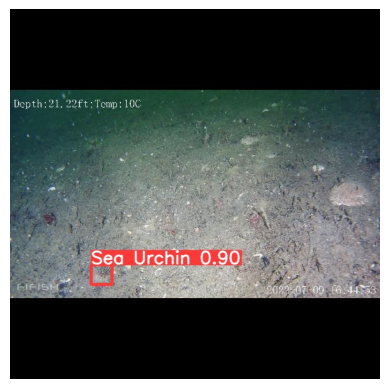

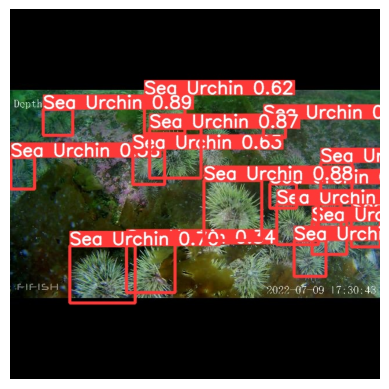

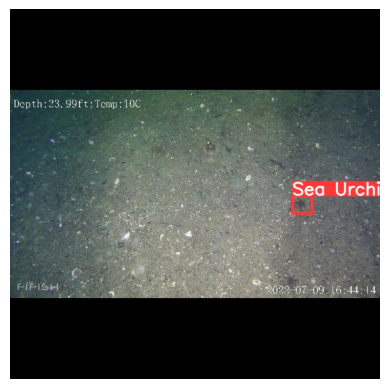

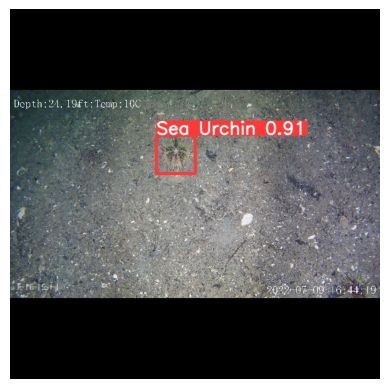

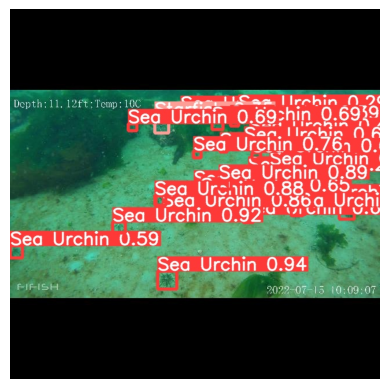

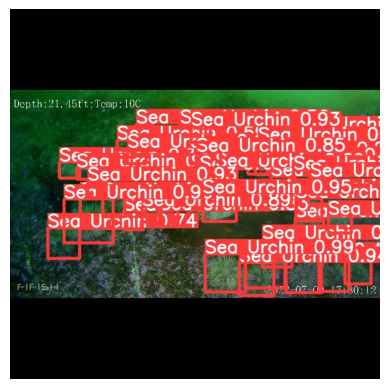

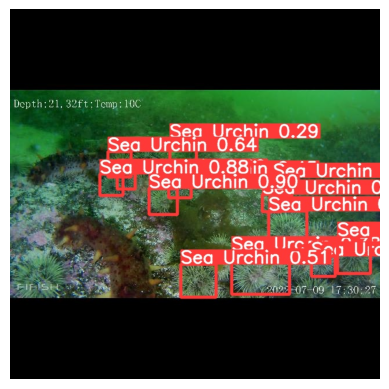

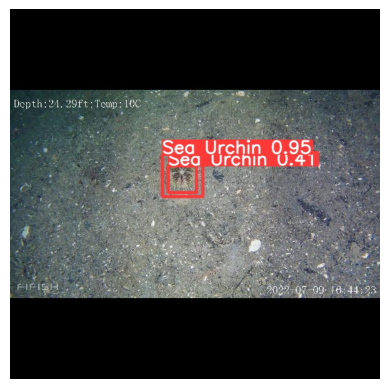

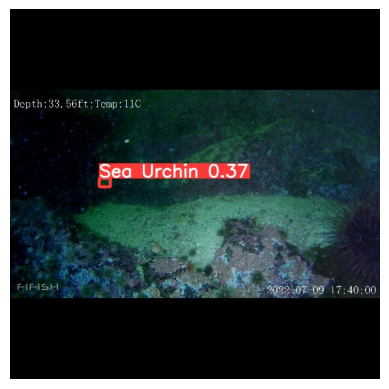

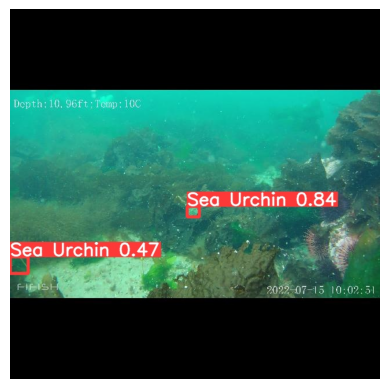

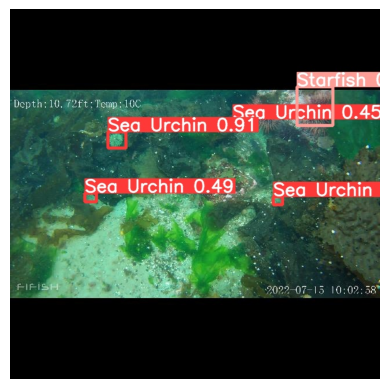

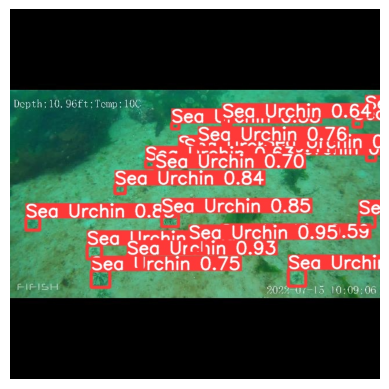

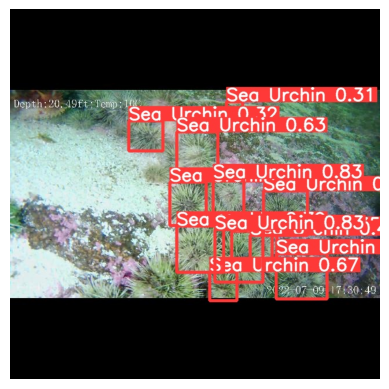

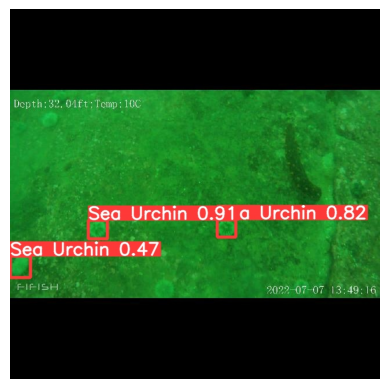

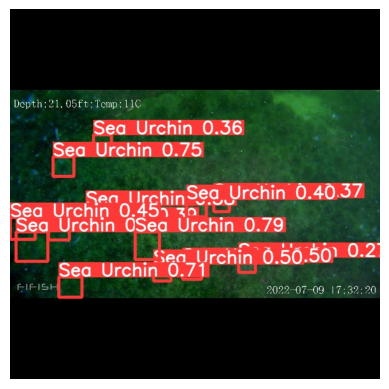

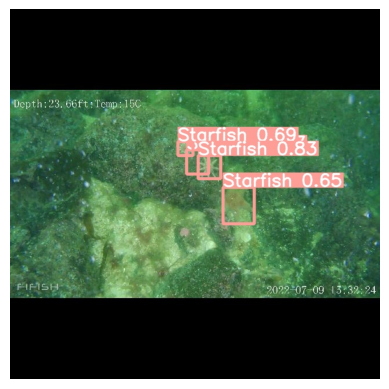

In [16]:
#so what this code is doing is it is finding the most recent folder in runs/detect so i can display all the images that we just tested 
base_path = 'runs/detect'
most_recent_file = None
most_recent_time = 0
#for every folder gets its time and compares it to get the most recent folder 
for entry in os.scandir(base_path):
    if entry.is_dir():
        # Get the modification time      
        mod_time = entry.stat().st_mtime_ns
        if mod_time > most_recent_time:
            # Update the folder and mod time
            most_recent_directory = entry.name
            most_recent_time = mod_time
            
if most_recent_directory:
    most_recent_directory_path = os.path.join(base_path, most_recent_directory)

    # List image files in the folder
    image_files = [entry.path for entry in os.scandir(most_recent_directory_path) if entry.is_file() and entry.name.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if image_files:
        # Display every image in the folder
        for image_path in image_files:
            img = mpimg.imread(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()

Index(['               epoch', '      train/box_loss', '      train/obj_loss',
       '      train/cls_loss', '   metrics/precision', '      metrics/recall',
       '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss',
       '        val/obj_loss', '        val/cls_loss', '               x/lr0',
       '               x/lr1', '               x/lr2'],
      dtype='object')


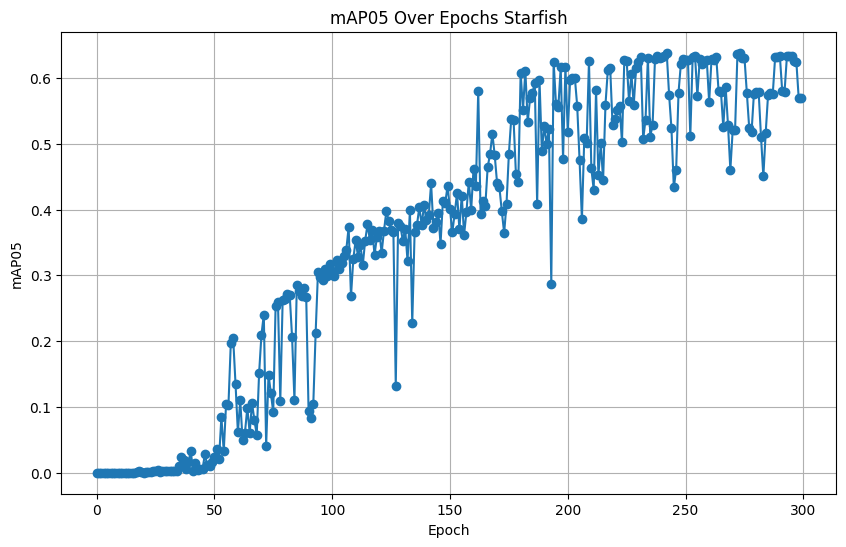

In [17]:
#gets ths data from the training results
csv_file = "runs/train/exp46/results.csv"
df = pd.read_csv(csv_file)
print(df.columns)

#gets the values from the results 
mAP05 = df['     metrics/mAP_0.5']
epochs = df['               epoch']

# Create the line graph
plt.figure(figsize=(10, 6)) 
plt.plot(epochs, mAP05, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("mAP05")
plt.title("mAP05 Over Epochs Starfish")
plt.grid(True)  
plt.show()

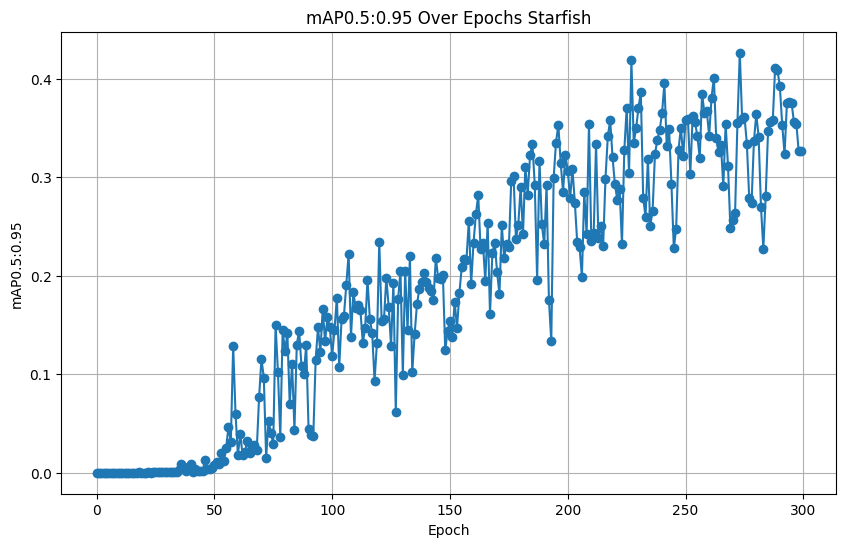

In [18]:
#gets the values from the results 
mAP095 = df['metrics/mAP_0.5:0.95']
epochs = df['               epoch']

# Create the line graph
plt.figure(figsize=(10, 6)) 
plt.plot(epochs, mAP095, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("mAP0.5:0.95")
plt.title("mAP0.5:0.95 Over Epochs Starfish")
plt.grid(True)  
plt.show()

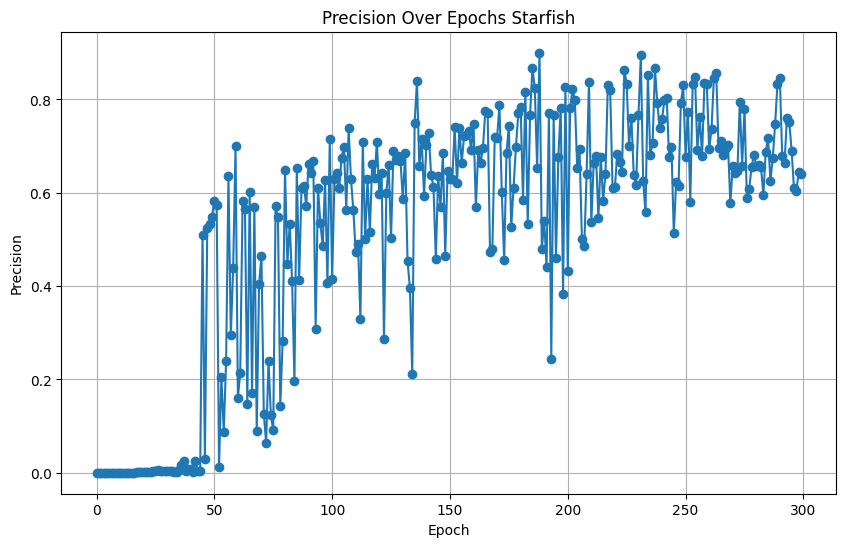

In [19]:
#gets the values from the results 
Precision = df['   metrics/precision']
epochs = df['               epoch']

# Create the line graph
plt.figure(figsize=(10, 6)) 
plt.plot(epochs, Precision, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.title("Precision Over Epochs Starfish")
plt.grid(True)  
plt.show()

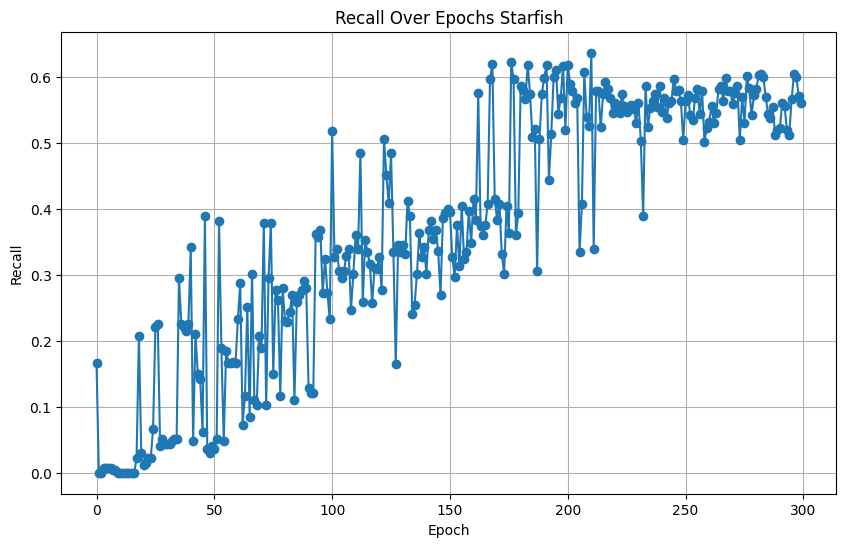

In [20]:
#gets the values from the results 
Recall = df['      metrics/recall']
epochs = df['               epoch']

# Create the line graph
plt.figure(figsize=(10, 6)) 
plt.plot(epochs, Recall, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.title("Recall Over Epochs Starfish")
plt.grid(True)  
plt.show()

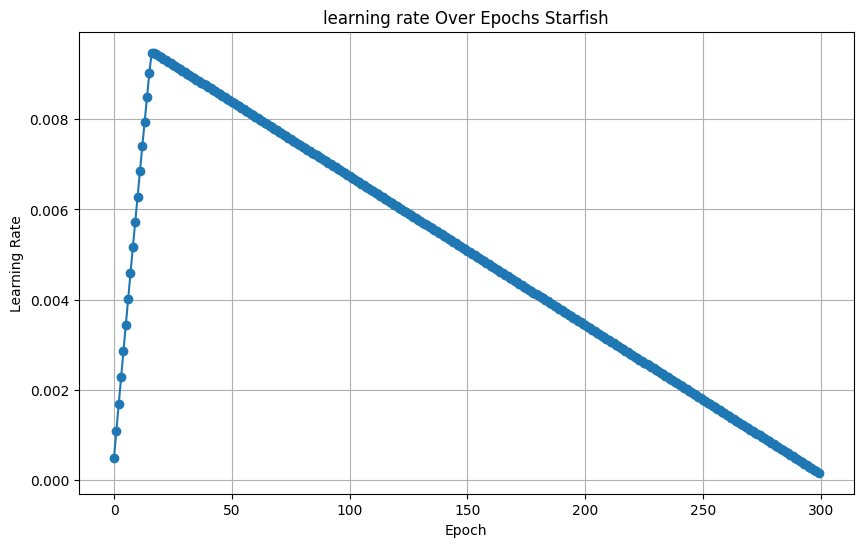

In [21]:
#gets the values from the results 
LearningRate = df['               x/lr1']
epochs = df['               epoch']

# Create the line graph
plt.figure(figsize=(10, 6)) 
plt.plot(epochs, LearningRate, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("learning rate Over Epochs Starfish")
plt.grid(True)  
plt.show()

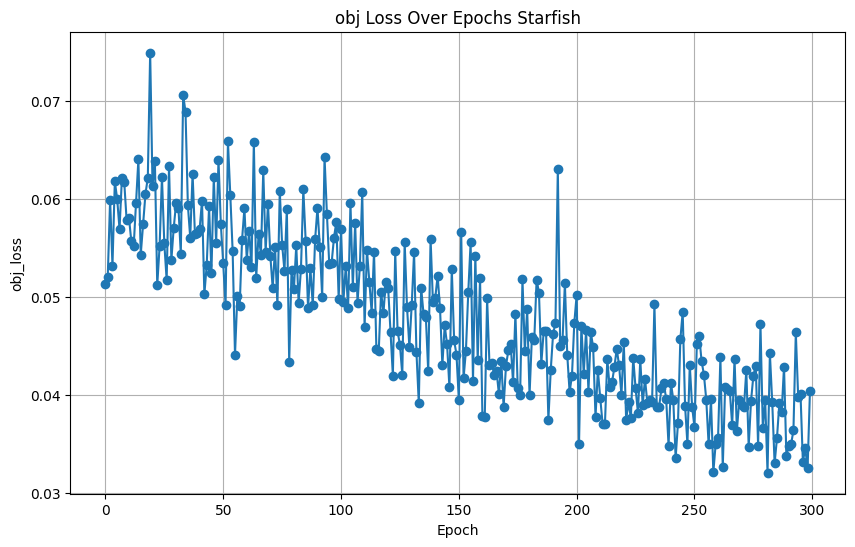

In [22]:
#gets the values from the results 
obj_loss = df['      train/obj_loss']
epochs = df['               epoch']

# Create the line graph
plt.figure(figsize=(10, 6)) 
plt.plot(epochs, obj_loss, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("obj_loss")
plt.title("obj Loss Over Epochs Starfish")
plt.grid(True)  
plt.show()

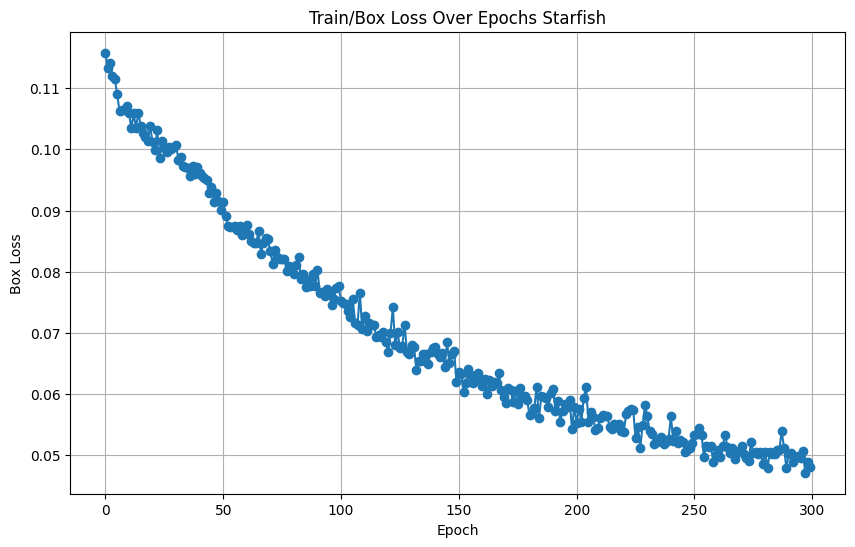

In [23]:
#gets the values from the results 
box_loss = df['      train/box_loss']
epochs = df['               epoch']

# Create the line graph
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(epochs, box_loss, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Box Loss")
plt.title("Train/Box Loss Over Epochs Starfish")
plt.grid(True)  # Add grid lines (optional)
plt.show()